# Assignment 4: CLASSIFICATION

## Q1. 
Consider logistic regression with two features x1 and x2. Suppose θ0 = −6, θ1 = 1, θ2=0.

### a. Write logistic regression equation for the hypothesis.

### $$ \hat{y} = \frac{1}{1 + e^{x-6}} $$

### b. Write equation for decision boundary.

### $$ x=6 $$

### c. Make a graph showing decision boundary and clearly specifying the y = 0 and y = 1 regions.

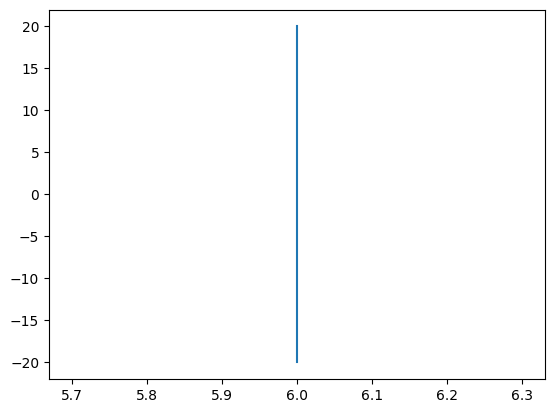

In [9]:
import numpy as np
from matplotlib import pyplot
import pandas as pd

t1=np.linspace(-20,20,200)
pyplot.plot([6]*200, t1)

Left side is y = 0 and right side is y = 1.

## Q2.
Repeat problem 1 taking θ0 = 2, θ1 = 1, θ2 = −2.

### a. Write logistic regression equation for the hypothesis.

### $$ \hat{y} = \frac{1}{1 + e^{-2x_2 + x_1 + 2}} $$

### b. Write equation for decision boundary.

### $$ x_1 = 2x_2 - 2 $$

### c. Make a graph showing decision boundary and clearly specifying the y = 0 and y = 1 regions.

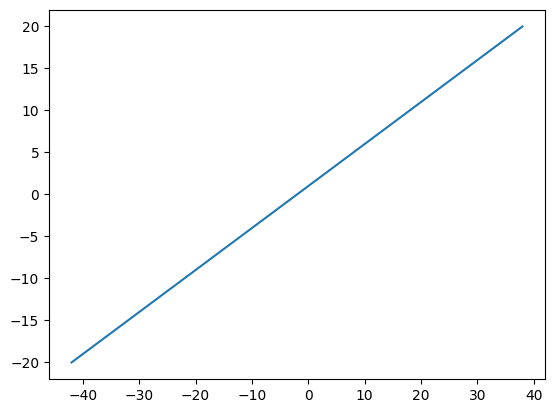

In [7]:
import numpy as np
from matplotlib import pyplot

def y(x): return 2 * x - 2

x2 = np.linspace(-20,20,200)
x1 = y(x2)
pyplot.plot(x1, x2)

Left side is y = 0 and right side is y = 1.

## Q3.
The following table shows average temperature values and their corresponding average humidity values for 12 months of a year for a certain city. We intend to design a prediction system for humidity using temperature values as feature.


![table](images/table.png)

### a. Add an output IsHumid which is 1 if humidity > 55%.





g. Find accuracy, precision, recall and f1_score.

In [13]:
temp = np.array([14.1, 16.7, 19.7, 25.2, 25.1, 18.8, 11.7, 10.2, 9.0, 9.1, 10.5, 12.6])
target = np.array([44.3, 50.4, 46.8, 33.7, 37.4, 54.2, 68.2, 69.0, 45.0, 51.3, 20.7, 24.4])
isHumid = target > 55
table = pd.DataFrame(data={'temperature': temp, 'humidity': target, 'isHumid': isHumid})
table


,temperature,humidity,isHumid
0,14.1,44.3,False
1,16.7,50.4,False
2,19.7,46.8,False
3,25.2,33.7,False
4,25.1,37.4,False
5,18.8,54.2,False
6,11.7,68.2,True
7,10.2,69.0,True
8,9.0,45.0,False
9,9.1,51.3,False


### b. Write logistic regression equation for the output IsHumid.

### $$ \hat{y} = \frac{1}{1 + e^{\theta_1x + \theta_0}} $$ where x is humidity.

### c. Find the equation for decision boundary.

### $$ x = - \frac{\theta_0}{\theta_1} $$

### d. Find predicted probability values h(x(i)), if $$ θ_0 = 1.366 $$ $$ θ_1 = −0.115 $$


In [19]:
import math 
pred_isHumid = 1 / (1+math.e**(-0.115*table['humidity'] + 1.366))
pred_isHumid

0     0.976535
1     0.988226
2     0.982294
3     0.924805
4     0.949550
5     0.992362
6     0.998464
7     0.998599
8     0.978311
9     0.989371
10    0.733900
11    0.808455
Name: humidity, dtype: float64

### e. Find predicted output (0 or 1), setting threshold to 0.5.

In [25]:
pred01_isHumid = pd.Series(int(i > 0.5) for i in pred_isHumid)
pred01_isHumid

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
dtype: int64

### f. Formulate the resulting confusion matrix.

In [28]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(table['isHumid'], pred01_isHumid))

[[ 0 10]
 [ 0  2]]


In [30]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Accuracy:", accuracy_score(table['isHumid'], pred01_isHumid))
print("Precision:", precision_score(table['isHumid'], pred01_isHumid))
print("Recall score:", recall_score(table['isHumid'], pred01_isHumid))
print("F1 score:", f1_score(table['isHumid'], pred01_isHumid))

Accuracy: 0.16666666666666666
Precision: 0.16666666666666666
Recall score: 1.0
F1 score: 0.2857142857142857


## Q4. 
Implement the model specified in problem 1 in Python and verify your manually calculated results of problem 3.

Hmmm, I don't get this question :(

## Q5. 
Following figure shows six pies that Johnny likes, and six that he does not.

![table](images/pies.png)

- Some possible attributes could be shape, crust size, crust shade, filling size, and filling shape.
- Number of classes or labels: 2, either Johnny like the pie or he does not.
- Considering only 3 features pie shape, crust size and filling size, the following table represents Jonny’s choice of
pies.

![table](images/pietable.png)
![table](images/pietable2.png)

### a. Write logistic regression equation for the output Choice.

### $$ \hat{y} = \frac{1}{1 + e^{\theta_3x_3 + \theta_2x_2 + \theta_1x_1 + \theta_0}} $$

### b. Encode all the categorical features using some appropriate coding method.

In [58]:
# from collections import defaultdict
# dct = defaultdict(list)
# for i in range(12):
#     get = input().split()
#     dct['Shape'].append(get[1])
#     dct['Crust'].append(get[2])
#     dct['Filling'].append(get[3])
#     dct['Choice'].append(get[4])
# print(dict(dct))

data = {'Shape': ['Circle', 'Circle', 'Triangle', 'Circle', 'Square', 'Circle', 'Circle', 'Square', 'Triangle', 'Circle', 'Square', 'Triangle'], 'Crust': ['Thick', 'Thick', 'Thick', 'Thin', 'Thick', 'Thick', 'Thick', 'Thick', 'Thin', 'Thick', 'Thick', 'Thick'], 'Filling': ['Thick', 'Thick', 'Thick', 'Thin', 'Thin', 'Thin', 'Thick', 'Thick', 'Thin', 'Thick', 'Thick', 'Thick'], 'Choice': ['positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative']}
df = pd.DataFrame(data=data)

In [59]:
df['Shape'] = df['Shape'].replace('Circle', 0)
df['Shape'] = df['Shape'].replace('Triangle', 1)
df['Shape'] = df['Shape'].replace('Square', 2)
df['Crust'] = df['Crust'].replace('Thick', 0)
df['Crust'] = df['Crust'].replace('Thin', 1)
df['Filling'] = df['Filling'].replace('Thick', 0)
df['Filling'] = df['Filling'].replace('Thin', 1)
df['Choice'] = df['Choice'].replace('negative', 0)
df['Choice'] = df['Choice'].replace('positive', 1)
df

/var/folders/_8/stmfqx710clbn04z1vg4j8lr0000gn/T/ipykernel_45836/4084979372.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Shape'] = df['Shape'].replace('Square', 2)
/var/folders/_8/stmfqx710clbn04z1vg4j8lr0000gn/T/ipykernel_45836/4084979372.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Crust'] = df['Crust'].replace('Thin', 1)
/var/folders/_8/stmfqx710clbn04z1vg4j8lr0000gn/T/ipykernel_45836/4084979372.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To

,Shape,Crust,Filling,Choice
0,0,0,0,1
1,0,0,0,1
2,1,0,0,1
3,0,1,1,1
4,2,0,1,1
5,0,0,1,1
6,0,0,0,0
7,2,0,0,0
8,1,1,1,0
9,0,0,0,0


### c. Implement the model in Python and provide the following:
- List the value for all parameters.
- Formulate the resulting confusion matrix.
- Find accuracy, precision, recall and f1_score.

In [72]:
from sklearn.linear_model import LogisticRegression

target = df['Choice']
data = df.drop(columns = ['Choice'])
lr = LogisticRegression().fit(data, target)
pred = lr.predict(data)
lr.intercept_, lr.coef_

(array([0.19727958]), array([[-0.51122687, -0.19351292,  0.65010077]]))

In [73]:
print(confusion_matrix(target, pred))

[[3 3]
 [2 4]]


In [67]:
print("Accuracy:", accuracy_score(target, pred))
print("Precision:", precision_score(target, pred))
print("Recall score:", recall_score(target, pred))
print("F1 score:", f1_score(target, pred))

Accuracy: 0.5833333333333334
Precision: 0.5714285714285714
Recall score: 0.6666666666666666
F1 score: 0.6153846153846154


### Q6. 
In problem 2 of practice problem set 1, you worked on fish market dataset provided in file D4_Fish_Market_Dataset.csv. You encoded all categorical data into numeric values. Take Weight as target and remaining 6 columns are features.

### a. Implement logistic regression model in Python to predict Species from features. Print the values of all training parameters.

In [69]:
fish_data = pd.read_csv("Datasets/Normalized_Fish_Market_dataset.csv")
fish_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,1,0.146667,0.304854,0.309091,0.358108,0.568334,0.418978
1,1,0.175758,0.320388,0.325455,0.378378,0.624055,0.459235
2,1,0.206061,0.318447,0.329091,0.376689,0.618123,0.514279
3,1,0.220000,0.365049,0.374545,0.417230,0.638566,0.480365
4,1,0.260606,0.368932,0.374545,0.425676,0.621966,0.576004
...,...,...,...,...,...,...,...
154,7,0.007394,0.077670,0.069091,0.077703,0.021012,0.048771
155,7,0.008121,0.081553,0.072727,0.079392,0.040723,0.031208
156,7,0.007394,0.089320,0.083636,0.084459,0.031842,0.029347
157,7,0.011939,0.110680,0.107273,0.108108,0.066424,0.143719


In [75]:
target_fish = fish_data['Species']
data_fish = fish_data.drop(columns = ['Species'])
lr1 = LogisticRegression().fit(data_fish, target_fish)
pred_fish = lr1.predict(data_fish)
lr1.intercept_, lr1.coef_

(array([-1.72973228,  1.04445573, -1.48437715,  0.43514293,  1.22620486,
        -1.65168302,  2.15998893]),
 array([[ 0.40693447, -0.08151046,  0.02430067,  0.68707502,  4.4680903 ,
          0.10846618],
        [-0.84632903, -0.37083384, -0.413896  , -0.23737527, -0.51156284,
          0.05533621],
        [ 0.43251954,  0.18661426,  0.20459789,  0.2011586 ,  0.22967787,
          0.69613576],
        [-0.5137824 , -0.61707128, -0.62100853, -0.56775076,  0.90130165,
         -0.69847695],
        [ 0.62789218, -0.08518746, -0.03683593, -0.80750448, -1.68139408,
          2.3999911 ],
        [ 0.50513015,  2.14050063,  2.0889882 ,  1.98575668, -1.53299801,
         -0.4058352 ],
        [-0.61236491, -1.17251185, -1.24614631, -1.26135979, -1.87311489,
         -2.1556171 ]]))

### b. For the implementation done in part a, print the confusion matrix and find accuracy, precision, recall, and f1_score.

In [76]:
print(confusion_matrix(target_fish, pred_fish))

[[35  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0]
 [ 0  0  0  0  6  0  0]
 [ 0  0  0  0 11  0  0]
 [ 0  0  0  0 54  0  2]
 [ 0  0  0  0  6 11  0]
 [ 0  0  0  0  1  0 13]]


In [83]:
print("Accuracy:", accuracy_score(target_fish, pred_fish))
print("Precision:", precision_score(target_fish, pred_fish, average='micro'))
print("Recall score:", recall_score(target_fish, pred_fish, average='micro'))
print("F1 score:", f1_score(target_fish, pred_fish, average='micro'))

Accuracy: 0.710691823899371
Precision: 0.710691823899371
Recall score: 0.710691823899371
F1 score: 0.710691823899371


In [85]:
print("ALL DONE!")

ALL DONE!
